# Model Building Process 

In [1]:
# Import the model data set 
import pandas as pd
df = pd.read_csv("Model_data.csv")

In [2]:
## Applying CountVectorizer & TFIDF 
# Extracting features by CountVectorizer from reviews 
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
reviews_feature_cv = count_vect.fit_transform(df.JwMarriot_reviews).toarray()
reviews_feature_cv.shape

(3000, 11259)

In [3]:
# Extracting features by TFIDF from reviews
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
reviews_feature_tfidf = tfidf_transformer.fit_transform(reviews_feature_cv).toarray()
reviews_feature_tfidf.shape

(3000, 11259)

In [4]:
## Aplying SMOTE oversampling technique for removing class imbalance 
from imblearn.over_sampling import SMOTE
over_sample = SMOTE(random_state = 50, sampling_strategy = "all")

In [5]:
X_oversample, y_oversample = over_sample.fit_sample(reviews_feature_cv, df['Sentiments']) 

In [6]:
# Total count of target classes or 'Sentiments' 
len(y_oversample)

8589

In [7]:
# Total number of reviews features with classes 
X_oversample.shape

(8589, 11259)

In [8]:
# Count of Sentiments or target classes 
import collections, numpy
collections.Counter(y_oversample)

Counter({1: 2863, 2: 2863, 0: 2863})

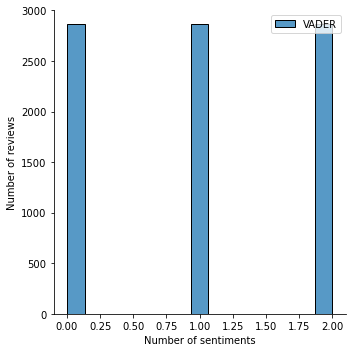

In [9]:
# Sentiments across reviews 
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
sns.displot(y_oversample, kde = False,  label = "VADER")
plt.xlabel("Number of sentiments")
plt.ylabel("Number of reviews")
plt.legend()
plt.show()

In [10]:
# Split data into train & test 
def split_into_words(i):
    return (i.split(" "))

In [11]:
seed = 7

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_oversample,y_oversample,test_size=0.2)

In [13]:
x_train.shape

(6871, 11259)

In [14]:
y_train.shape

(6871,)

In [15]:
x_test.shape

(1718, 11259)

In [16]:
y_test.shape

(1718,)

# Logistic Regression Classifier 

In [17]:
# Logististic Regression Classifier 
from sklearn.linear_model import LogisticRegression
model9 = LogisticRegression(random_state=50)
LR_clf = model9.fit(x_train, y_train)

In [18]:
# Testing Accuracy of Logististic Regression Classifier 
import numpy as np
predicted16 = LR_clf.predict(x_test)
np.mean(predicted16 == y_test) 

0.9755529685681025

In [19]:
# Training Accuracy of Logististic Regression Classifier 
import numpy as np
predicted17 = LR_clf.predict(x_train) 
np.mean(predicted17 == y_train)

0.9933051957502547

In [20]:
# Testing classification report 
import seaborn as sns
from sklearn import metrics
print(metrics.classification_report(y_test, predicted16))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       596
           1       0.98      0.98      0.98       556
           2       0.98      0.96      0.97       566

    accuracy                           0.98      1718
   macro avg       0.98      0.98      0.98      1718
weighted avg       0.98      0.98      0.98      1718



In [21]:
# Training classification report 
import seaborn as sns
from sklearn import metrics
print(metrics.classification_report(y_train, predicted17))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2267
           1       1.00      1.00      1.00      2307
           2       1.00      0.98      0.99      2297

    accuracy                           0.99      6871
   macro avg       0.99      0.99      0.99      6871
weighted avg       0.99      0.99      0.99      6871

